# 模擬生成

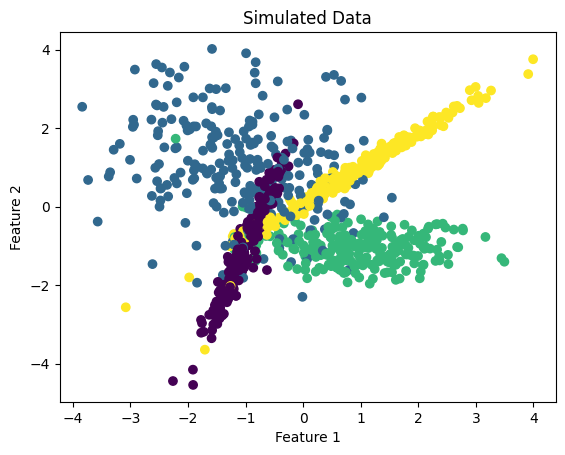

        Methods  Accuracy  Precision    Recall  F1 Score
0    One-vs-One     0.815   0.826561  0.819364  0.819794
1    One-vs-All     0.785   0.807011  0.787355  0.794212
2  Many-vs-Many     0.480   0.412527  0.493567  0.387122


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 生成模擬數據集
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, n_classes=4, n_clusters_per_class=1, random_state=42)

# 視覺化數據集
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data')
plt.show()

# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 定義分類器
svm = SVC(kernel='linear', random_state=42)

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(svm)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(svm)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(svm)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')

# 創建比較結果表格
data = {
    'Methods': ['One-vs-One', 'One-vs-All', 'Many-vs-Many'],
    'Accuracy': [ovo_accuracy, ova_accuracy, mvc_accuracy],
    'Precision': [ovo_precision, ova_precision, mvc_precision],
    'Recall': [ovo_recall, ova_recall, mvc_recall],
    'F1 Score': [ovo_f1, ova_f1, mvc_f1]
}

df = pd.DataFrame(data)

print(df)

# IRIS

資料集:<br>
Iris Dataset<br>
https://www.kaggle.com/datasets/vikrishnan/iris-dataset

# 無最佳化

SVM


One-vs-One Accuracy: 0.9666666666666667
One-vs-One Precision: 0.9761904761904763
One-vs-One Recall: 0.9523809523809524
One-vs-One F1 Score: 0.9620132953466287
One-vs-One Cohen's Kappa: 0.9479166666666666

One-vs-All Accuracy: 0.9
One-vs-All Precision: 0.8888888888888888
One-vs-All Recall: 0.9010989010989011
One-vs-All F1 Score: 0.8933333333333332
One-vs-All Cohen's Kappa: 0.8469387755102041

Many-vs-Many Accuracy: 0.6666666666666666
Many-vs-Many Precision: 0.7333333333333334
Many-vs-Many Recall: 0.7216117216117216
Many-vs-Many F1 Score: 0.6632996632996634
Many-vs-Many Cohen's Kappa: 0.5238095238095238


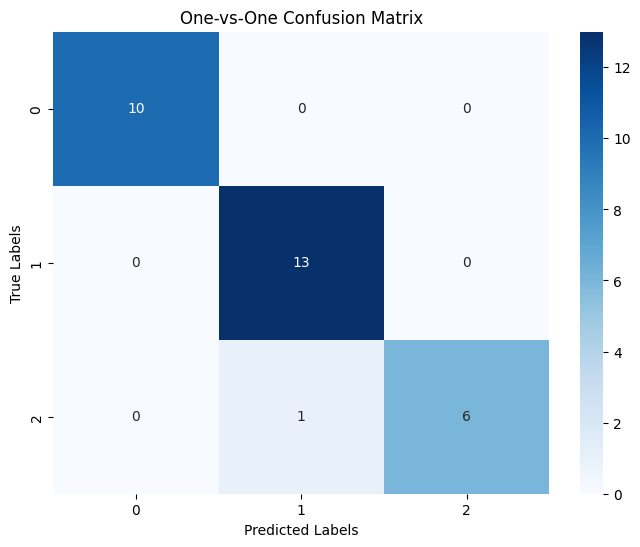

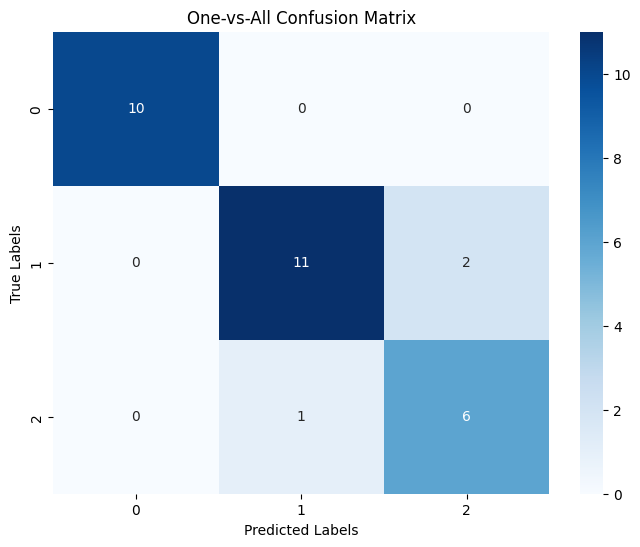

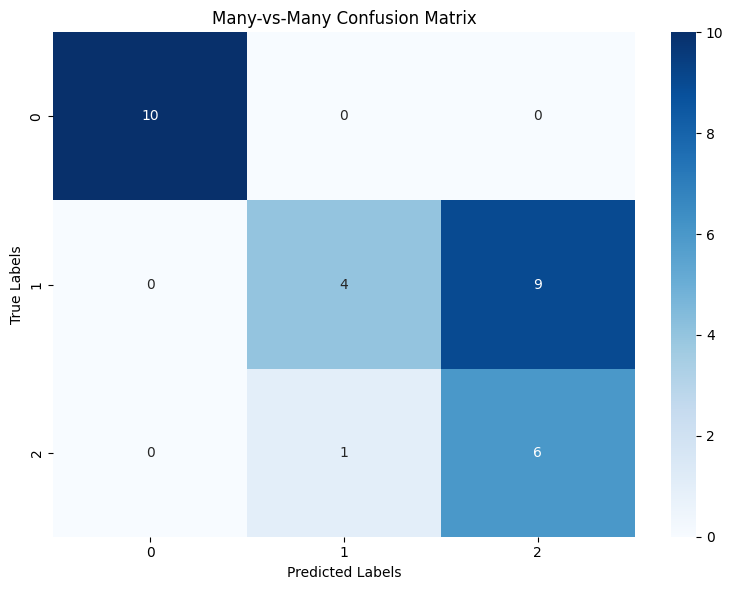

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/iris.data.csv')

# 提取特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 創建SVM模型
svm = SVC(C =1, kernel= 'linear', degree=2,random_state=1, probability= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(svm)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(svm)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')
ova_cm = confusion_matrix(y_test, ova_pred)
ova_kappa = cohen_kappa_score(y_test, ova_pred)

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(svm)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')
mvc_cm = confusion_matrix(y_test, mvc_pred)
mvc_kappa = cohen_kappa_score(y_test, mvc_pred)

# 打印評估結果
print("One-vs-One Accuracy:", ovo_accuracy)
print("One-vs-One Precision:", ovo_precision)
print("One-vs-One Recall:", ovo_recall)
print("One-vs-One F1 Score:", ovo_f1)
print("One-vs-One Cohen's Kappa:", ovo_kappa)
print()
print("One-vs-All Accuracy:", ova_accuracy)
print("One-vs-All Precision:", ova_precision)
print("One-vs-All Recall:", ova_recall)
print("One-vs-All F1 Score:", ova_f1)
print("One-vs-All Cohen's Kappa:", ova_kappa)
print()
print("Many-vs-Many Accuracy:", mvc_accuracy)
print("Many-vs-Many Precision:", mvc_precision)
print("Many-vs-Many Recall:", mvc_recall)
print("Many-vs-Many F1 Score:", mvc_f1)
print("Many-vs-Many Cohen's Kappa:", mvc_kappa)

#繪製混淆矩陣熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-All Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(mvc_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Many-vs-Many Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

Random Forset

One-vs-One Accuracy: 0.9666666666666667
One-vs-One Precision: 0.9761904761904763
One-vs-One Recall: 0.9523809523809524
One-vs-One F1 Score: 0.9620132953466287
One-vs-One Cohen's Kappa: 0.9479166666666666

One-vs-All Accuracy: 0.9666666666666667
One-vs-All Precision: 0.9761904761904763
One-vs-All Recall: 0.9523809523809524
One-vs-All F1 Score: 0.9620132953466287
One-vs-All Cohen's Kappa: 0.9479166666666666

Many-vs-Many Accuracy: 0.9666666666666667
Many-vs-Many Precision: 0.9761904761904763
Many-vs-Many Recall: 0.9523809523809524
Many-vs-Many F1 Score: 0.9620132953466287
Many-vs-Many Cohen's Kappa: 0.9479166666666666


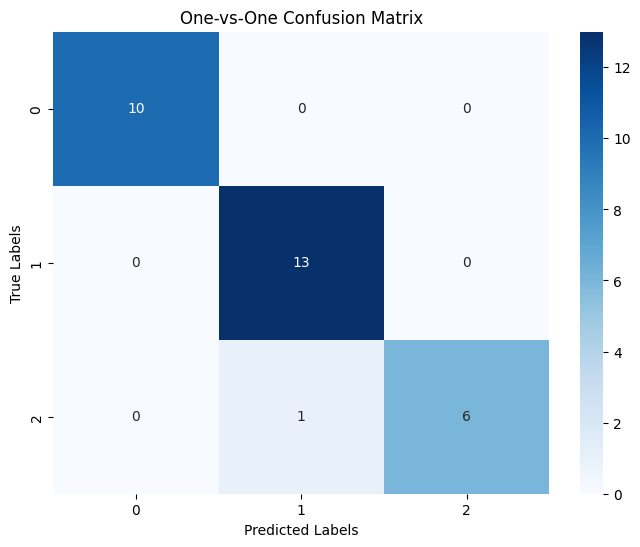

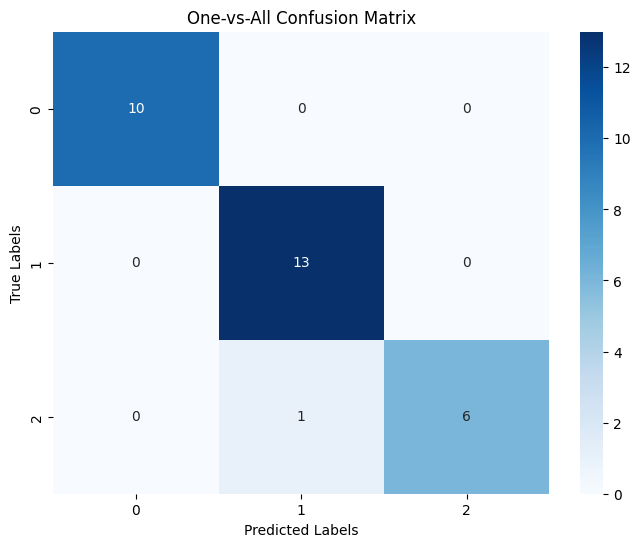

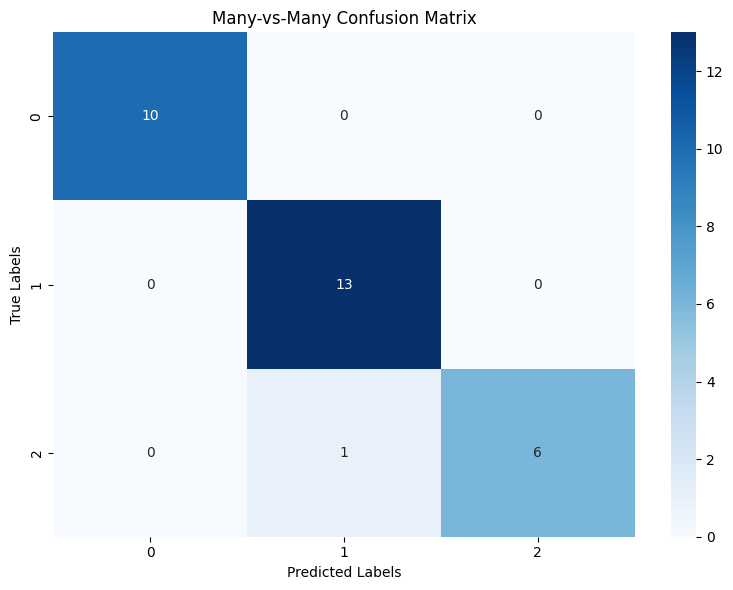

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/iris.data.csv')

# 提取特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 創建隨機森林模型
rf_model = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(rf_model)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(rf_model)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')
ova_cm = confusion_matrix(y_test, ova_pred)
ova_kappa = cohen_kappa_score(y_test, ova_pred)

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(rf_model)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')
mvc_cm = confusion_matrix(y_test, mvc_pred)
mvc_kappa = cohen_kappa_score(y_test, mvc_pred)

# 打印評估結果
print("One-vs-One Accuracy:", ovo_accuracy)
print("One-vs-One Precision:", ovo_precision)
print("One-vs-One Recall:", ovo_recall)
print("One-vs-One F1 Score:", ovo_f1)
print("One-vs-One Cohen's Kappa:", ovo_kappa)
print()
print("One-vs-All Accuracy:", ova_accuracy)
print("One-vs-All Precision:", ova_precision)
print("One-vs-All Recall:", ova_recall)
print("One-vs-All F1 Score:", ova_f1)
print("One-vs-All Cohen's Kappa:", ova_kappa)
print()
print("Many-vs-Many Accuracy:", mvc_accuracy)
print("Many-vs-Many Precision:", mvc_precision)
print("Many-vs-Many Recall:", mvc_recall)
print("Many-vs-Many F1 Score:", mvc_f1)
print("Many-vs-Many Cohen's Kappa:", mvc_kappa)

#繪製混淆矩陣熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-All Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(mvc_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Many-vs-Many Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# GirdSearchCV最佳化

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/iris.data.csv')

# 提取特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 創建SVM模型
svm = SVC(random_state=1, probability=True)

# 定義參數網格
param_grid = {
    'estimator__C': [0.1, 1, 10], #容錯範圍
    'estimator__kernel': ['linear', 'rbf', 'poly'], #內核類型
    'estimator__degree': [2, 3, 4] #多項式核函數的次數
}

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(svm)
grid_search_ovo = GridSearchCV(estimator=ovo, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovo.fit(X_train, y_train)
best_model_ovo = grid_search_ovo.best_estimator_
ovo_pred = best_model_ovo.predict(X_test)

# 一對其餘（One-vs-Rest）
ovr = OneVsRestClassifier(svm)
grid_search_ovr = GridSearchCV(estimator=ovr, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovr.fit(X_train, y_train)
best_model_ovr = grid_search_ovr.best_estimator_
ovr_pred = best_model_ovr.predict(X_test)

# 多輸出編碼（OutputCode）
mvm = OutputCodeClassifier(svm)
grid_search_mvm = GridSearchCV(estimator=mvm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_mvm.fit(X_train, y_train)
best_model_mvm = grid_search_mvm.best_estimator_
mvm_pred = best_model_mvm.predict(X_test)

# 計算評估指標
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

ovr_accuracy = accuracy_score(y_test, ovr_pred)
ovr_precision = precision_score(y_test, ovr_pred, average='macro')
ovr_recall = recall_score(y_test, ovr_pred, average='macro')
ovr_f1 = f1_score(y_test, ovr_pred, average='macro')
ovr_cm = confusion_matrix(y_test, ovr_pred)
ovr_kappa = cohen_kappa_score(y_test, ovr_pred)

mvm_accuracy = accuracy_score(y_test, mvm_pred)
mvm_precision = precision_score(y_test, mvm_pred, average='macro')
mvm_recall = recall_score(y_test, mvm_pred, average='macro')
mvm_f1 = f1_score(y_test, mvm_pred, average='macro')
mvm_cm = confusion_matrix(y_test, mvm_pred)
mvm_kappa = cohen_kappa_score(y_test, mvm_pred)

# 打印結果
print("一對一法（One-vs-One）:")
print("最佳模型參數：", grid_search_ovo.best_params_)
print("準確率：", ovo_accuracy)
print("精確度：", ovo_precision)
print("召回率：", ovo_recall)
print("F1值：", ovo_f1)
print("混淆矩陣：\n", ovo_cm)
print("Kappa係數：", ovo_kappa)

print("\n一對其餘（One-vs-Rest）:")
print("最佳模型參數：", grid_search_ovr.best_params_)
print("準確率：", ovr_accuracy)
print("精確度：", ovr_precision)
print("召回率：", ovr_recall)
print("F1值：", ovr_f1)
print("混淆矩陣：\n", ovr_cm)
print("Kappa係數：", ovr_kappa)

print("\n多輸出編碼（OutputCode）:")
print("最佳模型參數：", grid_search_mvm.best_params_)
print("準確率：", mvm_accuracy)
print("精確度：", mvm_precision)
print("召回率：", mvm_recall)
print("F1值：", mvm_f1)
print("混淆矩陣：\n", mvm_cm)
print("Kappa係數：", mvm_kappa)

一對一法（One-vs-One）:
最佳模型參數： {'estimator__C': 1, 'estimator__degree': 2, 'estimator__kernel': 'poly'}
準確率： 0.9666666666666667
精確度： 0.9761904761904763
召回率： 0.9523809523809524
F1值： 0.9620132953466287
混淆矩陣：
 [[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]
Kappa係數： 0.9479166666666666

一對其餘（One-vs-Rest）:
最佳模型參數： {'estimator__C': 0.1, 'estimator__degree': 4, 'estimator__kernel': 'poly'}
準確率： 1.0
精確度： 1.0
召回率： 1.0
F1值： 1.0
混淆矩陣：
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Kappa係數： 1.0

多輸出編碼（OutputCode）:
最佳模型參數： {'estimator__C': 10, 'estimator__degree': 2, 'estimator__kernel': 'rbf'}
準確率： 1.0
精確度： 1.0
召回率： 1.0
F1值： 1.0
混淆矩陣：
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Kappa係數： 1.0
